In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('CarPriceData.csv')
df

,Unnamed: 0,Brand,Kilometers,Model_name,Manu_Year,fuel_type,SAles_price
0,0,Renault,"23,290",KWID,2017,Petrol,3.43
1,1,Tata,"96,177",Harrier,2019,Diesel,12.88
2,2,Maruti,"14,190",Alto,2018,Petrol,3.86
3,3,Maruti,"50,969",Celerio,2018,CNG,5.13
4,4,Honda,"26,736",Jazz,2017,Petrol,6.90
...,...,...,...,...,...,...,...
5995,5995,BMW,"85,000",X5,2015,Diesel,31.25
5996,5996,Ford,"70,000",Endeavour,2017,Diesel,24.60
5997,5997,Honda,"75,000",CR-V,2016,Petrol,11.51
5998,5998,Mahindra,"62,000",XUV500,2017,Diesel,11.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   6000 non-null   int64  
 1   Brand        6000 non-null   object 
 2   Kilometers   6000 non-null   object 
 3   Model_name   6000 non-null   object 
 4   Manu_Year    6000 non-null   int64  
 5   fuel_type    6000 non-null   object 
 6   SAles_price  6000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 328.2+ KB


No Null values found in data.

Dropping Unnames: 0 column

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df["Brand"].value_counts()

Maruti           3000
Honda             600
Mahindra          600
Renault           300
Tata              300
Hyundai           300
BMW               300
Ford              300
Mercedes-Benz     300
Name: Brand, dtype: int64

In [6]:
df["fuel_type"].value_counts()

Petrol    3600
Diesel    2100
CNG        300
Name: fuel_type, dtype: int64

In [7]:
df["Model_name"].value_counts()

Baleno       600
Ciaz         600
Swift        600
KWID         300
Creta        300
XUV500       300
CR-V         300
Endeavour    300
X5           300
Wagon        300
S-Presso     300
Harrier      300
Thar         300
Jazz         300
Celerio      300
Alto         300
GLA          300
Name: Model_name, dtype: int64

In [8]:
df["Manu_Year"].value_counts()

2017    2100
2019     900
2018     900
2015     600
2014     600
2020     300
2011     300
2016     300
Name: Manu_Year, dtype: int64

In [28]:
list2=[]
list1 = list(df['Kilometers'])
for values in list1:
    a = values.replace(',','')
    list2.append(a)
print(list2)

['23290', '96177', '14190', '50969', '26736', '34278', '33206', '46365', '30480', '76734', '86294', '39781', '82496', '45716', '72880', '85000', '70000', '75000', '62000', '57007', '23290', '96177', '14190', '50969', '26736', '34278', '33206', '46365', '30480', '76734', '86294', '39781', '82496', '45716', '72880', '85000', '70000', '75000', '62000', '57007', '23290', '96177', '14190', '50969', '26736', '34278', '33206', '46365', '30480', '76734', '86294', '39781', '82496', '45716', '72880', '85000', '70000', '75000', '62000', '57007', '23290', '96177', '14190', '50969', '26736', '34278', '33206', '46365', '30480', '76734', '86294', '39781', '82496', '45716', '72880', '85000', '70000', '75000', '62000', '57007', '23290', '96177', '14190', '50969', '26736', '34278', '33206', '46365', '30480', '76734', '86294', '39781', '82496', '45716', '72880', '85000', '70000', '75000', '62000', '57007', '23290', '96177', '14190', '50969', '26736', '34278', '33206', '46365', '30480', '76734', '86294', 

In [30]:
df['Kilometers'] = pd.DataFrame(list2)

In [32]:
df['Kilometers'] = df['Kilometers'].astype(float)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        6000 non-null   object 
 1   Kilometers   6000 non-null   float64
 2   Model_name   6000 non-null   object 
 3   Manu_Year    6000 non-null   int64  
 4   fuel_type    6000 non-null   object 
 5   SAles_price  6000 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 281.4+ KB


Using LabelEncoder to convert object type columns into numeric columns

In [34]:
encoding_Le = ["Brand","Model_name","fuel_type"]

for cls in encoding_Le:
    df[cls]=le.fit_transform(df[cls])

array([[<AxesSubplot:title={'center':'Brand'}>,
        <AxesSubplot:title={'center':'Kilometers'}>],
       [<AxesSubplot:title={'center':'Model_name'}>,
        <AxesSubplot:title={'center':'Manu_Year'}>],
       [<AxesSubplot:title={'center':'fuel_type'}>,
        <AxesSubplot:title={'center':'SAles_price'}>]], dtype=object)

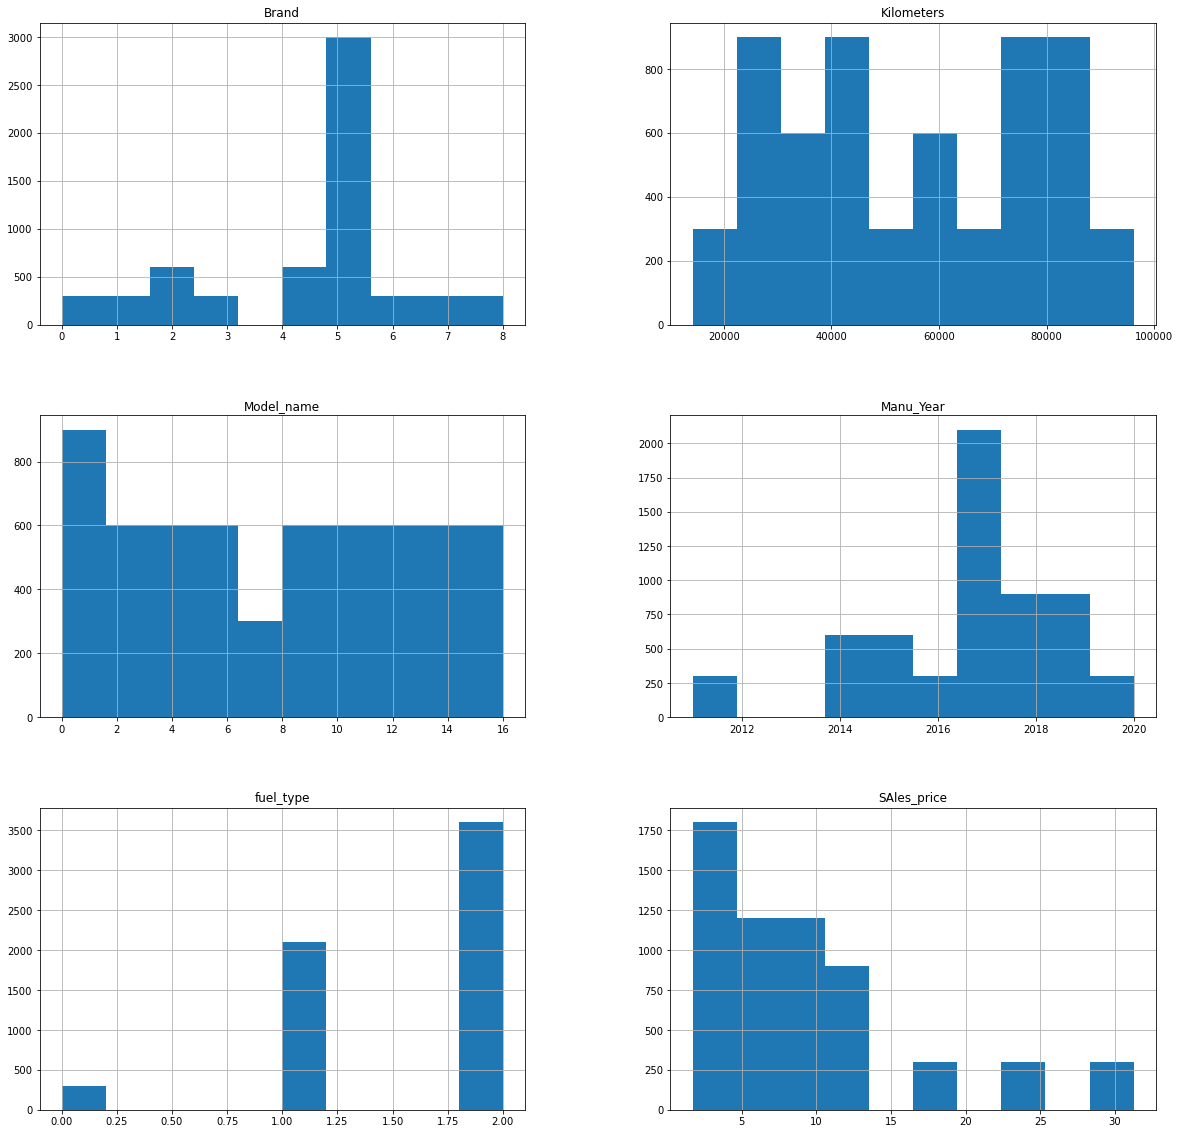

In [35]:
df.hist(figsize=(20,20))

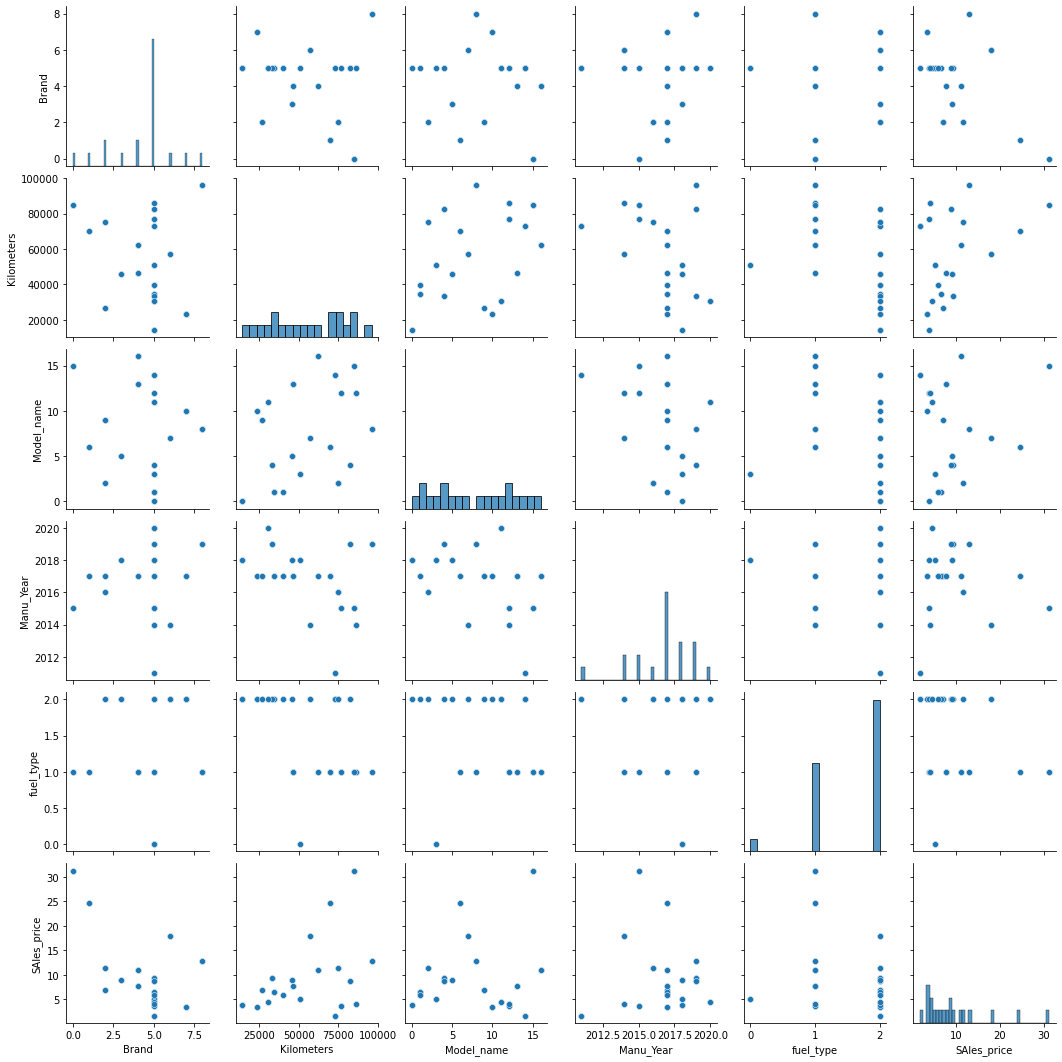

In [36]:
sns.pairplot(df)

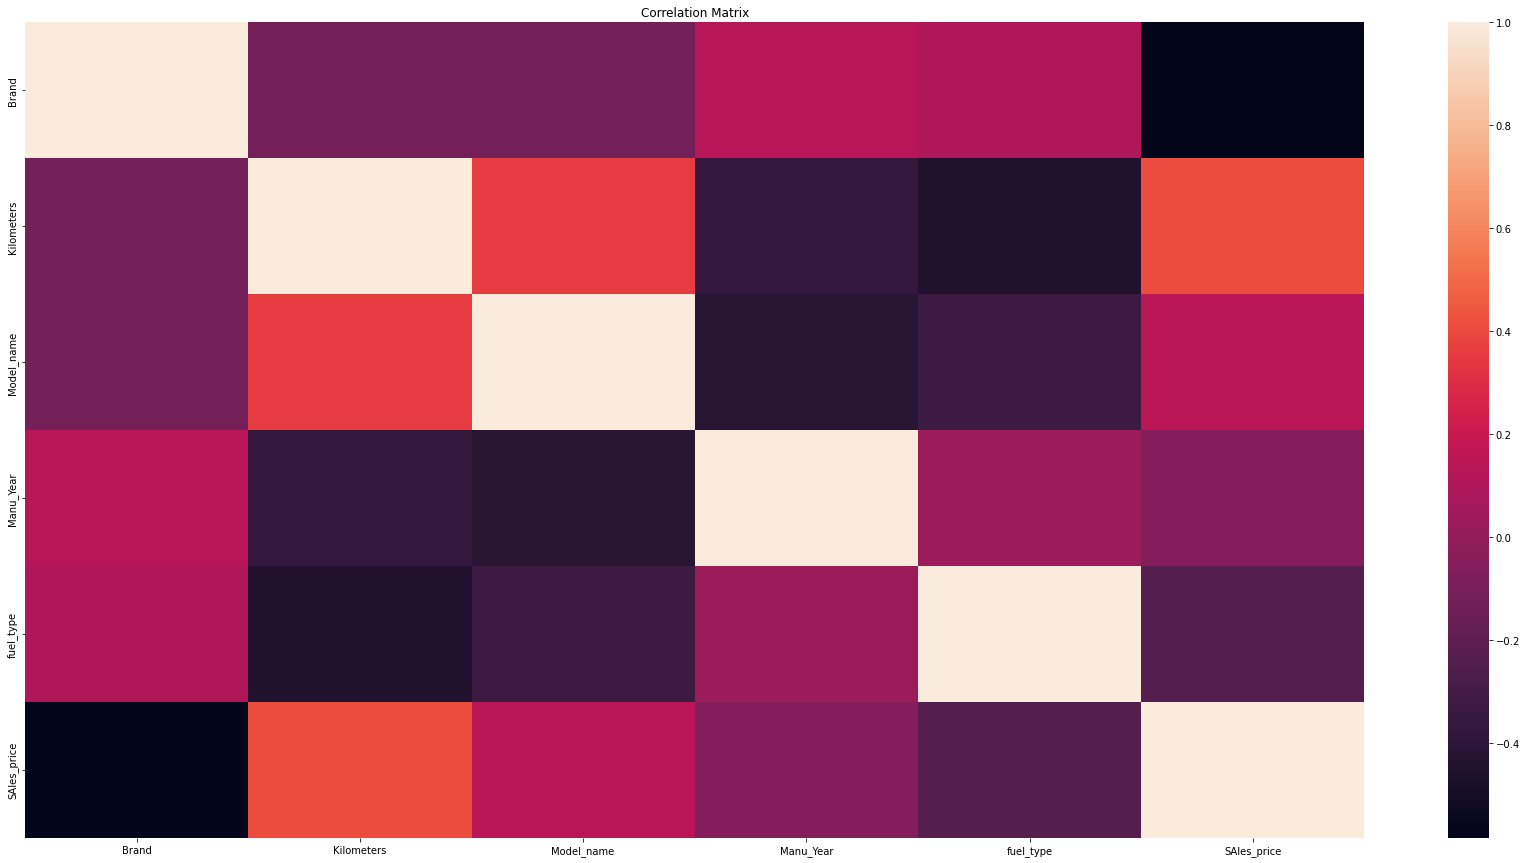

In [37]:
corr_mat = df.corr()
plt.figure(figsize=[30,15])
sns.heatmap(corr_mat,annot=False)
plt.title('Correlation Matrix')
plt.savefig('Correlation_matrix.jpg')
plt.show()

Observations:
    1) SalesPrice is highly negatively correlated to Brand.
    2) SalesPrice is correlated with kilometers,Model_name and manufacturing year.

In [38]:
df.corr()["SAles_price"].sort_values()

Brand         -0.584247
fuel_type     -0.234728
Manu_Year     -0.057087
Model_name     0.141186
Kilometers     0.408952
SAles_price    1.000000
Name: SAles_price, dtype: float64

<AxesSubplot:xlabel='Brand', ylabel='SAles_price'>

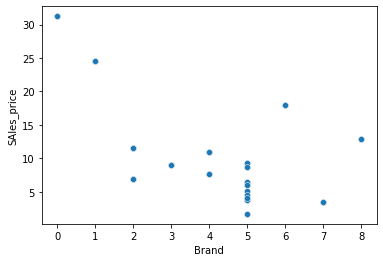

In [39]:
sns.scatterplot(x="Brand", y="SAles_price",data=df)

<AxesSubplot:xlabel='fuel_type', ylabel='SAles_price'>

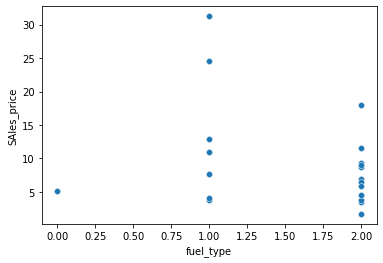

In [40]:
sns.scatterplot(x="fuel_type", y="SAles_price",data=df)

<AxesSubplot:xlabel='Manu_Year', ylabel='SAles_price'>

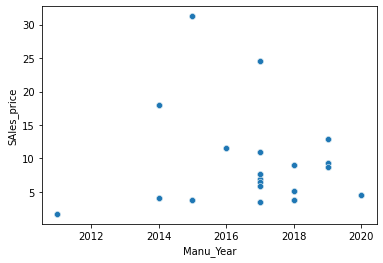

In [41]:
sns.scatterplot(x="Manu_Year", y="SAles_price",data=df)

<AxesSubplot:xlabel='Model_name', ylabel='SAles_price'>

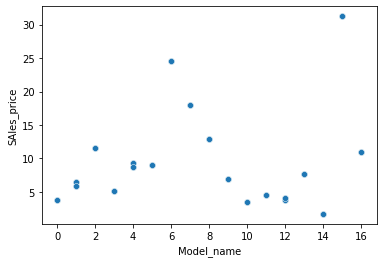

In [42]:
sns.scatterplot(x="Model_name", y="SAles_price",data=df)

<AxesSubplot:xlabel='Kilometers', ylabel='SAles_price'>

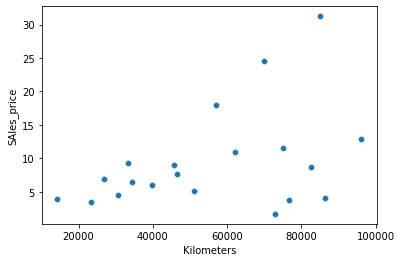

In [43]:
sns.scatterplot(x="Kilometers", y="SAles_price",data=df)

In [44]:
df.describe()

,Brand,Kilometers,Model_name,Manu_Year,fuel_type,SAles_price
count,6000.000000,6000.000000,6000.000000,6000.0000,6000.00000,6000.000000
mean,4.350000,55429.950000,7.650000,2016.7500,1.55000,9.494000
std,1.878321,23646.577484,4.932703,2.0708,0.58954,7.276019
min,0.000000,14190.000000,0.000000,2011.0000,0.00000,1.700000
25%,3.750000,34010.000000,3.750000,2015.7500,1.00000,4.402500
50%,5.000000,53988.000000,7.500000,2017.0000,2.00000,7.310000
75%,5.000000,75433.500000,12.000000,2018.0000,2.00000,11.127500
max,8.000000,96177.000000,16.000000,2020.0000,2.00000,31.250000


<AxesSubplot:xlabel='SAles_price', ylabel='Density'>

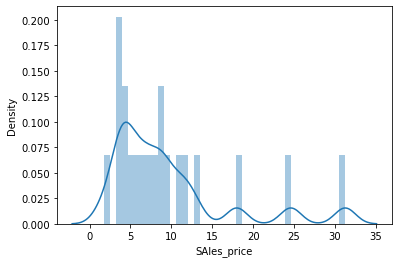

In [45]:
sns.distplot(df["SAles_price"])

In [46]:
df.skew()

Brand         -0.558121
Kilometers     0.000299
Model_name     0.070330
Manu_Year     -0.948528
fuel_type     -0.926527
SAles_price    1.673627
dtype: float64

Brand             AxesSubplot(0.125,0.816017;0.168478x0.0639831)
Kilometers     AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
Model_name     AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
Manu_Year      AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
fuel_type         AxesSubplot(0.125,0.739237;0.168478x0.0639831)
SAles_price    AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
dtype: object

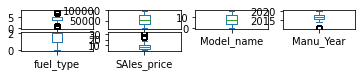

In [47]:
df.plot(kind='box',subplots=True,layout=(10,4))

In [50]:
x = df.drop(['SAles_price'],axis=1)
y= df['SAles_price']

In [51]:
model = [DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(),SVR()]
for i in range(0,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=i)
    for models in model:
        models.fit(x_train,y_train)
        y_pred = models.predict(x_test)
        R2Score = r2_score(y_test,y_pred)
        print("R2 score for random state: ", i, " is ",R2Score)
print()
print()
print()
print()

R2 score for random state:  0  is  1.0
R2 score for random state:  0  is  1.0
R2 score for random state:  0  is  0.4913844044877883
R2 score for random state:  0  is  0.17863985035526098
R2 score for random state:  1  is  1.0
R2 score for random state:  1  is  1.0
R2 score for random state:  1  is  0.4635986004138085
R2 score for random state:  1  is  0.17542635428998332
R2 score for random state:  2  is  1.0
R2 score for random state:  2  is  1.0
R2 score for random state:  2  is  0.47331837641354024
R2 score for random state:  2  is  0.17624142747792715
R2 score for random state:  3  is  1.0
R2 score for random state:  3  is  1.0
R2 score for random state:  3  is  0.5090803610854401
R2 score for random state:  3  is  0.17729416704189838
R2 score for random state:  4  is  1.0
R2 score for random state:  4  is  1.0
R2 score for random state:  4  is  0.47377251342453486
R2 score for random state:  4  is  0.1673899910488671
R2 score for random state:  5  is  1.0
R2 score for random state

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=3)
dtr = DecisionTreeRegressor()
parameters={'max_features':['auto','sqrt','log2']}
gridsearch =GridSearchCV(dtr,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'max_features': 'auto'}

In [54]:
dtr_model = DecisionTreeRegressor(max_features='auto')
dtr_model.fit(x_train,y_train)
predictions = dtr_model.predict(x_test)
r2Score = r2_score(y_test,predictions)
print("R2 Score is: ",r2Score)

R2 Score is:  1.0


In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error: ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error: ",mean_squared_error(y_test,predictions))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,predictions)))

Mean Absolute Error:  1.8749424011121672e-14
Mean Squared Error:  8.232253346928409e-28
Root Mean Squared Error:  2.86919036435863e-14
